## Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

## Load and inspect dataset

In [2]:
df = pd.read_csv(f"{os.getcwd()}\\Mall_Customers.csv")
print(df)
print(df.info())

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 column

## Clean data

In [3]:
# Checking for null values in the DataFrame
null_counts = df.isnull().sum()
null_counts

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#Rename columns for easier use of them
df.rename(columns={'Age': 'age', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'spending_score', 'Genre': 'gender'}, inplace=True)
df

,CustomerID,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#Delete column CustomerID because this column has no value for hierarchical clustering
df.drop('CustomerID', axis=1, inplace=True)
df

,gender,age,income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Normalize / Preprocess data

In [6]:
# Define the columns to normalize
columns_to_normalize = ['age', 'income', 'spending_score']

# Apply Min-Max normalization
df[columns_to_normalize] = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())
df

,gender,age,income,spending_score
0,Male,0.019231,0.000000,0.387755
1,Male,0.057692,0.000000,0.816327
2,Female,0.038462,0.008197,0.051020
3,Female,0.096154,0.008197,0.775510
4,Female,0.250000,0.016393,0.397959
...,...,...,...,...
195,Female,0.326923,0.860656,0.795918
196,Female,0.519231,0.909836,0.275510
197,Male,0.269231,0.909836,0.744898
198,Male,0.269231,1.000000,0.173469


## Get features

In [7]:
# Create X with features that will be used for hierarchical clustering:
X = df[['age', 'income', 'spending_score']]
X

,age,income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


## Dendrogram method to find the optimal number of clusters

In [8]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

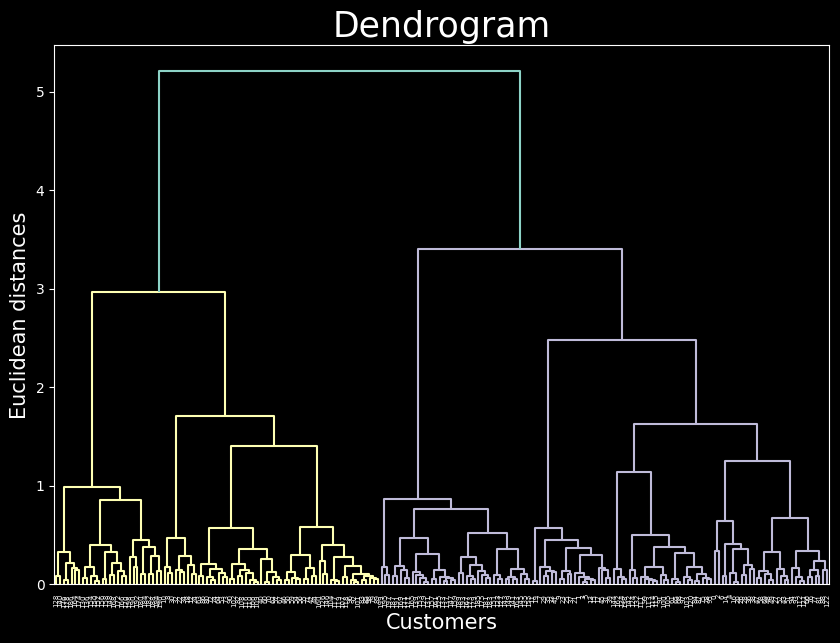

In [9]:
plt.figure(figsize = (10,7))
linkage_data = linkage(X, method='ward', metric='euclidean')
                                                        
Dendrogram = dendrogram(linkage_data)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

## Hierarchical Clustering

### Train model

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2) 
y_pred = hc.fit_predict(X)

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

### Evaluating Hierarchical Clustering performance by Silhouette Score

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
print(f'Silhouette Score for n = 2: {silhouette_score(X, y_pred)}')

Silhouette Score for n = 2: 0.33752602297520423


### Optimum number of clusters based on Silhouette Score

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores_list_hc = []

for i in range(2, 21):
  hc = AgglomerativeClustering(n_clusters = i) 
  y_pred = hc.fit_predict(X)
  silhouette_scores_list_hc.append({"number_of_clusters": i, "silhouette_score": silhouette_score(X, y_pred)})
  print(f'Silhouette Score for n={i} : {silhouette_score(X, y_pred)}')

Silhouette Score for n=2 : 0.33752602297520423
Silhouette Score for n=3 : 0.34095328138330877
Silhouette Score for n=4 : 0.36523259901072064
Silhouette Score for n=5 : 0.39554543347265486
Silhouette Score for n=6 : 0.3982651406330171
Silhouette Score for n=7 : 0.40553945327886154
Silhouette Score for n=8 : 0.3927075663113482
Silhouette Score for n=9 : 0.39731096791731574
Silhouette Score for n=10 : 0.4008407730341865
Silhouette Score for n=11 : 0.39757235670998825
Silhouette Score for n=12 : 0.38510420523986527
Silhouette Score for n=13 : 0.3925855103015333
Silhouette Score for n=14 : 0.37212165888110094
Silhouette Score for n=15 : 0.35405779443231067
Silhouette Score for n=16 : 0.3583106113015141
Silhouette Score for n=17 : 0.3526958460028657
Silhouette Score for n=18 : 0.3529189364918753
Silhouette Score for n=19 : 0.34449279687121526
Silhouette Score for n=20 : 0.3417370494519297


In [15]:
#Searching for the maximun Silhouette Score to identify the best number of clusters
max = 0

for index, element in enumerate(silhouette_scores_list_hc):
  if silhouette_scores_list_hc[index]['silhouette_score'] > silhouette_scores_list_hc[max]['silhouette_score']:
    max = index

ss_hc_best = silhouette_scores_list_hc[max]['number_of_clusters']
print(f"the best number of clusters is {ss_hc_best}")
print(f"silhouette_score is {silhouette_scores_list_hc[max]['silhouette_score']}")

the best number of clusters is 7
silhouette_score is 0.40553945327886154


### Optimum number of clusters based on CH-Index

In [16]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

ch_indexes_list_hc = []

for i in range(2, 21):
  hc = AgglomerativeClustering(n_clusters = i) 
  y_pred = hc.fit_predict(X)
  ch_indexes_list_hc.append({"number_of_clusters": i, "ch_index": calinski_harabasz_score(X, y_pred)})
  print(f'CH-Index for n={i} : {calinski_harabasz_score(X, y_pred)}')

CH-Index for n=2 : 112.84248712685313
CH-Index for n=3 : 105.83185751097217
CH-Index for n=4 : 113.83943831364613
CH-Index for n=5 : 123.99070840826573
CH-Index for n=6 : 120.85750210156094
CH-Index for n=7 : 122.60460214647581
CH-Index for n=8 : 123.72323858244535
CH-Index for n=9 : 124.71294319803533
CH-Index for n=10 : 126.25304311545503
CH-Index for n=11 : 126.33214571307572
CH-Index for n=12 : 125.15726420598682
CH-Index for n=13 : 125.5433270976289
CH-Index for n=14 : 125.21411985054598
CH-Index for n=15 : 123.65972203670769
CH-Index for n=16 : 122.45187824203407
CH-Index for n=17 : 120.62256841930922
CH-Index for n=18 : 119.53368666489017
CH-Index for n=19 : 119.08311993119733
CH-Index for n=20 : 118.0174727046983


In [17]:
#Searching for the maximun CH-Index to identify the best number of clusters
max = 0

for index, element in enumerate(ch_indexes_list_hc):
  if ch_indexes_list_hc[index]['ch_index'] > ch_indexes_list_hc[max]['ch_index']:
    max = index

ch_hc_best = ch_indexes_list_hc[max]['number_of_clusters']
print(f"the best number of clusters is {ch_hc_best}")
print(f"ch_index is {ch_indexes_list_hc[max]['ch_index']}")

the best number of clusters is 11
ch_index is 126.33214571307572


## KMeans

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

ch_indexes_list_kmeans = []

for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  y_pred = kmeans.fit_predict(X)

  ch_indexes_list_kmeans.append({'number_of_clusters': i, 'ch_index': calinski_harabasz_score(X, y_pred)})
  
ch_indexes_list_kmeans

[{'number_of_clusters': 2, 'ch_index': np.float64(130.24641468584736)},
 {'number_of_clusters': 3, 'ch_index': np.float64(111.30168950315087)},
 {'number_of_clusters': 4, 'ch_index': np.float64(98.89368950691149)},
 {'number_of_clusters': 5, 'ch_index': np.float64(125.93103938550396)},
 {'number_of_clusters': 6, 'ch_index': np.float64(133.63829417338732)},
 {'number_of_clusters': 7, 'ch_index': np.float64(125.82090111294697)},
 {'number_of_clusters': 8, 'ch_index': np.float64(118.40780524168399)},
 {'number_of_clusters': 9, 'ch_index': np.float64(113.87181581932887)},
 {'number_of_clusters': 10, 'ch_index': np.float64(122.4647685635943)},
 {'number_of_clusters': 11, 'ch_index': np.float64(130.038240173564)},
 {'number_of_clusters': 12, 'ch_index': np.float64(124.67824608636033)},
 {'number_of_clusters': 13, 'ch_index': np.float64(129.34216302251943)},
 {'number_of_clusters': 14, 'ch_index': np.float64(126.78910967912061)},
 {'number_of_clusters': 15, 'ch_index': np.float64(120.17048479

### Optimum number of clusters based on CH-Index

In [19]:
#Searching for the maximun CH-Index to identify the best number of clusters
max = 0

for index, element in enumerate(ch_indexes_list_kmeans):
  if ch_indexes_list_kmeans[index]['ch_index'] > ch_indexes_list_kmeans[max]['ch_index']:
    max = index

ch_kmeans_best = ch_indexes_list_kmeans[max]['number_of_clusters']
print(f"the best number of clusters is {ch_kmeans_best}")
print(f"CH-Index is {ch_indexes_list_kmeans[max]['ch_index']}")

the best number of clusters is 6
CH-Index is 133.63829417338732


### Optimum number of clusters based on Silhouette Score

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores_list_kmeans = []

for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  y_pred = kmeans.fit_predict(X)

  silhouette_scores_list_kmeans.append({'number_of_clusters': i, 'silhouette_score': silhouette_score(X, y_pred)})
  
silhouette_scores_list_kmeans

[{'number_of_clusters': 2, 'silhouette_score': np.float64(0.3652498066402899)},
 {'number_of_clusters': 3, 'silhouette_score': np.float64(0.3402793310494219)},
 {'number_of_clusters': 4,
  'silhouette_score': np.float64(0.36586394154453444)},
 {'number_of_clusters': 5,
  'silhouette_score': np.float64(0.40421034059490324)},
 {'number_of_clusters': 6, 'silhouette_score': np.float64(0.4191792861638622)},
 {'number_of_clusters': 7, 'silhouette_score': np.float64(0.4207658655813822)},
 {'number_of_clusters': 8,
  'silhouette_score': np.float64(0.36744992310528163)},
 {'number_of_clusters': 9, 'silhouette_score': np.float64(0.3629127393794175)},
 {'number_of_clusters': 10, 'silhouette_score': np.float64(0.366103860035204)},
 {'number_of_clusters': 11,
  'silhouette_score': np.float64(0.37327682228530307)},
 {'number_of_clusters': 12,
  'silhouette_score': np.float64(0.36655817414244773)},
 {'number_of_clusters': 13,
  'silhouette_score': np.float64(0.3728716430475757)},
 {'number_of_cluster

In [21]:
#Searching for the maximun Silhouette Score to identify the best number of clusters
max = 0

for index, element in enumerate(silhouette_scores_list_kmeans):
  if silhouette_scores_list_kmeans[index]['silhouette_score'] > silhouette_scores_list_kmeans[max]['silhouette_score']:
    max = index

ss_kmeans_best = silhouette_scores_list_kmeans[max]['number_of_clusters']
print(f"the best number of clusters is {ss_kmeans_best}")
print(f"silhouette_score is {silhouette_scores_list_kmeans[max]['silhouette_score']}")

the best number of clusters is 7
silhouette_score is 0.4207658655813822


## KMeans and Hierarchical Algorithms' Performaces by CH-Index and Silhouette Score

### Silhouette Score

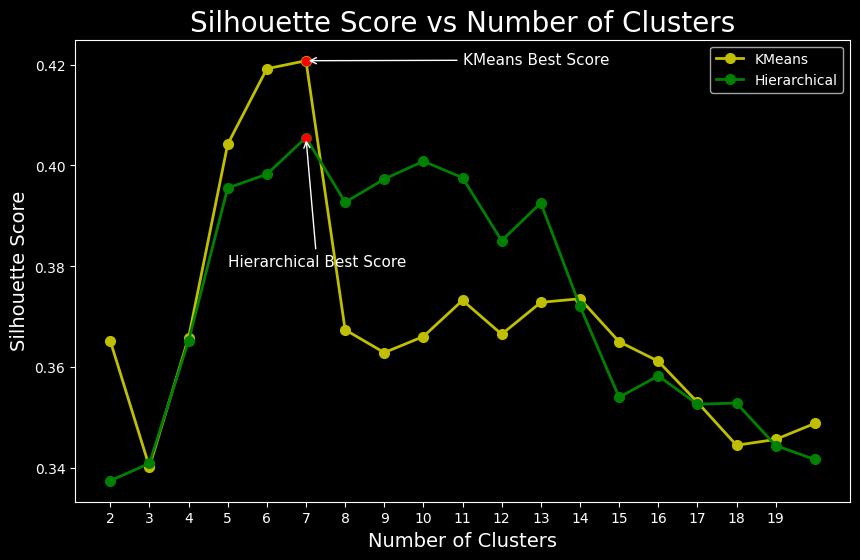

In [22]:
import matplotlib.pyplot as plt

x_kmeans = [element['number_of_clusters'] for element in silhouette_scores_list_kmeans]
y_kmeans = [element['silhouette_score'] for element in silhouette_scores_list_kmeans]

x_hc = [element['number_of_clusters'] for element in silhouette_scores_list_hc]
y_hc = [element['silhouette_score'] for element in silhouette_scores_list_hc]

plt.figure(figsize = (10,6))
plt.plot(x_kmeans, y_kmeans, color='y', linestyle='-', marker='o', markersize=7, lw=2, label='KMeans')
plt.plot(x_hc, y_hc, color='g', linestyle='-', marker='o', markersize=7, lw=2, label='Hierarchical')

plt.plot(ss_hc_best, y_hc[ss_hc_best-2], marker='o', color='r')
plt.plot(ss_kmeans_best, y_kmeans[ss_kmeans_best-2], marker='o', color='r')

plt.annotate('Hierarchical Best Score', xy=(ss_hc_best, y_hc[ss_hc_best-2]), xytext=(5, 0.38), 
             arrowprops=dict(arrowstyle='->'), fontsize=11)
plt.annotate('KMeans Best Score', xy=(ss_kmeans_best, y_kmeans[ss_kmeans_best-2]), xytext=(11, 0.42), 
             arrowprops=dict(arrowstyle='->'), fontsize=11)

plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score vs Number of Clusters', fontsize=20)
plt.xticks(range(2,20))

plt.legend()
plt.show()


In this plot we can clearly see that Silhouette Score is much higher in KMeans clustering comparing with Hierarchical. 

For the Hierarchical Algotihm the best number of clusters is 7 and Silhouette Score for this number of clusters is approximately 0.406. For the KMeans clustering Algorithm the best number of clusters is 10 and Silhouette Score for this number of clusters is approximately 0.432.

---


Silhouette Score in KMeans is higher than in Hierarchical Algorightm, hence **based on Silhouette Score KMeans is better clustering Algorithm for this dataset**.

### CH-Index

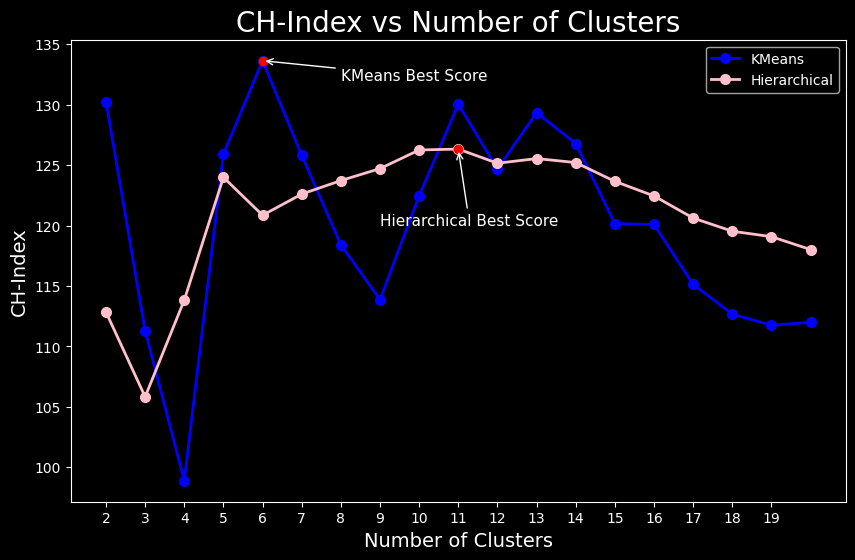

In [23]:
import matplotlib.pyplot as plt

x_kmeans = [element['number_of_clusters'] for element in ch_indexes_list_kmeans]
y_kmeans = [element['ch_index'] for element in ch_indexes_list_kmeans]

x_hc = [element['number_of_clusters'] for element in ch_indexes_list_hc]
y_hc = [element['ch_index'] for element in ch_indexes_list_hc]

plt.figure(figsize = (10,6))
plt.plot(x_kmeans, y_kmeans, color='b', linestyle='-', marker='o', markersize=7, lw=2, label='KMeans')
plt.plot(x_hc, y_hc, color='pink', linestyle='-', marker='o', markersize=7, lw=2, label='Hierarchical')

plt.plot(ch_hc_best, y_hc[ch_hc_best-2], marker='o', color='r')
plt.plot(ch_kmeans_best, y_kmeans[ch_kmeans_best-2], marker='o', color='r')

plt.annotate('Hierarchical Best Score', xy=(ch_hc_best, y_hc[ch_hc_best-2]), xytext=(9, 120), 
             arrowprops=dict(arrowstyle='->'), fontsize=11)
plt.annotate('KMeans Best Score', xy=(ch_kmeans_best, y_kmeans[ch_kmeans_best-2]), xytext=(8, 132), 
             arrowprops=dict(arrowstyle='->'), fontsize=11)

plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('CH-Index', fontsize=14)
plt.title('CH-Index vs Number of Clusters', fontsize=20)
plt.xticks(range(2,20))

plt.legend()
plt.show()

In this plot we can clearly see that CH-Index is much higher in KMeans clustering comparing with Hierarchical. 

For the Hierarchical Algotihm the best number of clusters is 11 and CH-Index for this number of clusters is approximately 126. For the KMeans clustering Algorithm the best number of clusters is 9 and CH-Index for this number of clusters is approximately 139.

---


CH-Index in KMeans is higher than in Hierarchical Algorightm, hence **based on CH-Index KMeans is better clustering Algorithm for this dataset**.

## Summary

Based on Silhouette Score and CH-Index KMeans clustering Algorithm is better for the current dataset than Hierarchical Algorithm.

Hence optimum number of clusters are 9 or 10.
